In [7]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from PmtIDMap import PMTIDMap
map_pmt = PMTIDMap("/cvmfs/juno.ihep.ac.cn/centos7_amd64_gcc830/Pre-Release/J21v1r0-Pre2/offline/Simulation/DetSimV2/DetSimOptions/data/PMTPos_Acrylic_with_chimney.csv")
import os
from glob import glob

name_source = "ACU/Co60"
# name_source = "ACU-CLS/Laser0.05"
# option_rec = "_change_n"
option_rec = ""
path_file_npz = f"ACU_calib_event_{name_source.replace('/', '_')}{option_rec}.npz"
data_basic_path = f"/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/{name_source}/"
# v_files_path = glob(f"{data_basic_path}Co60_0_0_[0-1]*")[:8]
v_files_path = glob(f"{data_basic_path}*_0_0_*")
print("Input files directory:\t",v_files_path)

Exception ignored in: <function NpzFile.__del__ at 0x7f0f6364e0d0>
Traceback (most recent call last):
  File "/afs/ihep.ac.cn/users/l/luoxj/junofs_500G/miniconda3/envs/tf/lib/python3.8/site-packages/numpy/lib/npyio.py", line 223, in __del__
    self.close()
  File "/afs/ihep.ac.cn/users/l/luoxj/junofs_500G/miniconda3/envs/tf/lib/python3.8/site-packages/numpy/lib/npyio.py", line 214, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'


Input files directory:	 ['/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_12858.2', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_-15740.6', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_14094.6', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_-17500', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_-16237.6', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_17145.3', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_17298.5', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_-17191.9', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_16131.7', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/ACU/Co60/Co60_0_0_15874', '/afs/ihep.ac.cn/users/v/valprod0/Pre-Releases/J21v1r0-Pre2/11/AC

In [8]:
path_savefig = "/afs/ihep.ac.cn/users/l/luoxj/TOFCalibration/figure/"
if not os.path.exists(path_savefig):
    os.makedirs(path_savefig)

In [9]:
import LoadMultiFiles
from importlib import reload
reload(LoadMultiFiles)
from LoadMultiFiles import LoadFileListUprootOptimized
list_name_branch_filter = ["Width","Peak","PMTID"]
v_position = [ os.path.basename(path) for path in v_files_path ]
v_position_z = [float(position.split("_")[-1]) for position in v_position]

# --- Get PMT position and Get distance from vertex to pmt----------------------
pmtid_certain = 1
xyz_pmtid_certain = map_pmt.idToXYZ(pmtid_certain)

v_position_y = [float(position.split("_")[-2]) for position in v_position]
v_position_x = [float(position.split("_")[-3]) for position in v_position]
v_distance_vertex_and_pmt = []
for x,y,z in zip(v_position_x, v_position_y, v_position_z):
    v_distance_vertex_and_pmt.append(
        np.sqrt((x-xyz_pmtid_certain[0])**2+(y-xyz_pmtid_certain[1])**2+(z-xyz_pmtid_certain[2])**2)
    )
v_distance_vertex_and_pmt = np.array(v_distance_vertex_and_pmt)
#-------------------------------------------------------------------------------------

# v_fileNo = ["0" if z>14.5e3 else "*" for z in v_position_z]
v_fileNo = []
for R in v_distance_vertex_and_pmt:
    if R<5e3 :
        v_fileNo.append("0")
    elif R<32e3:
        v_fileNo.append("[0-4]")
    else:
        v_fileNo.append("*")
# v_fileNo = ["0" if R>5e3 else "*" for R in v_distance_vertex_and_pmt]
# v_fileNo = ["0" if z>14.5e3 else "[0-2]" for z in v_position_z]
list_files_calib = [f"{data_basic_path}{position}/calib/user-root/user-calib-{fileNo}.root"
              for position,fileNo in zip(v_position,v_fileNo)]
list_files_rec = [f"{data_basic_path}{position}/recQTMLE{option_rec}/user-root/user-recQTMLE{option_rec}-{fileNo}.root"
                    for position,fileNo in zip(v_position,v_fileNo)]
print("Position:\t", v_position)

Position:	 ['Co60_0_0_12858.2', 'Co60_0_0_-15740.6', 'Co60_0_0_14094.6', 'Co60_0_0_-17500', 'Co60_0_0_-16237.6', 'Co60_0_0_17145.3', 'Co60_0_0_17298.5', 'Co60_0_0_-17191.9', 'Co60_0_0_16131.7', 'Co60_0_0_15874', 'Co60_0_0_16259', 'Co60_0_0_-6440.88', 'Co60_0_0_17500', 'Co60_0_0_-16706.5', 'Co60_0_0_-17410', 'Co60_0_0_-15182.9', 'Co60_0_0_0', 'Co60_0_0_-15604.9', 'Co60_0_0_-15874', 'Co60_0_0_-16365.2', 'Co60_0_0_-10039.2', 'Co60_0_0_-16882', 'Co60_0_0_-17600', 'Co60_0_0_16394.3', 'Co60_0_0_17600', 'Co60_0_0_-16126.7', 'Co60_0_0_10060.3', 'Co60_0_0_-14094.6', 'Co60_0_0_-17280.1', 'Co60_0_0_15740.6', 'Co60_0_0_-17040.3', 'Co60_0_0_-16526.6', 'Co60_0_0_17410', 'Co60_0_0_16730.8', 'Co60_0_0_16557.7', 'Co60_0_0_15986.1', 'Co60_0_0_6132.2', 'Co60_0_0_15182.9', 'Co60_0_0_-12849', 'Co60_0_0_17014.9', 'Co60_0_0_16879.9', 'Co60_0_0_-15990.5', 'Co60_0_0_15604.9']


R_xy ( PMT ):	 0.9369999857098879
z ( PMT ):	 19.365


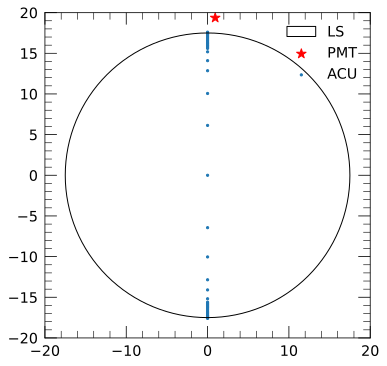

In [10]:
circle = plt.Circle((0,0), 17.5,color="black", fill=False,label="LS")
fig, ax = plt.subplots()
ax.add_patch(circle)
R_ax = 20
ax.set_xlim(-R_ax,R_ax)
ax.set_ylim(-R_ax,R_ax)
ax.set_aspect(1.0)

R_pmt = np.sqrt(xyz_pmtid_certain[0]**2+xyz_pmtid_certain[1]**2)/1e3
z_pmt = xyz_pmtid_certain[2]/1e3
print("R_xy ( PMT ):\t",R_pmt)
print("z ( PMT ):\t",z_pmt)
ax.scatter(R_pmt, z_pmt, marker="*", color="r",label="PMT")

v_position_z = np.array(v_position_z)
# for x,y,z in zip(v_position_x,v_position_y, v_position_z):
ax.scatter(np.sqrt(np.array(v_position_x)**2+np.array(v_position_y)**2)/1e3,
           v_position_z/1e3, s=5, label="ACU")
ax.legend()

plt.savefig(path_savefig+"detector_overview.png")

In [11]:
# print( (v_position_z[v_distance_vertex_and_pmt>35e3]/1e3)**3)

In [12]:
load_data = True
if load_data:
    with np.load(path_file_npz, allow_pickle=True) as f:
        dir_event_diff_position = f["calib_events"].item()
        dir_event_diff_position_rec = f["rec_events"].item()
else:
    dir_event_diff_position = LoadFileListUprootOptimized(list_files=list_files_calib,name_branch="calibevt",
                                                      list_corresponding_keys=v_position,
                                                      list_branch_filter=list_name_branch_filter)
    dir_event_diff_position_rec = LoadFileListUprootOptimized(list_files=list_files_rec,name_branch="TRec",
                                                                        list_corresponding_keys=v_position)
v_position = np.array(v_position)

print(dir_event_diff_position.keys())
print("Calib File Keys:\t", dir_event_diff_position[v_position[0]].keys())
print("Position List:\t",dir_event_diff_position.keys())

dict_keys(['Co60_0_0_12858.2', 'Co60_0_0_-15740.6', 'Co60_0_0_14094.6', 'Co60_0_0_-17500', 'Co60_0_0_-16237.6', 'Co60_0_0_17145.3', 'Co60_0_0_17298.5', 'Co60_0_0_-17191.9', 'Co60_0_0_16131.7', 'Co60_0_0_15874', 'Co60_0_0_16259', 'Co60_0_0_-6440.88', 'Co60_0_0_17500', 'Co60_0_0_-16706.5', 'Co60_0_0_-17410', 'Co60_0_0_-15182.9', 'Co60_0_0_0', 'Co60_0_0_-15604.9', 'Co60_0_0_-15874', 'Co60_0_0_-16365.2', 'Co60_0_0_-10039.2', 'Co60_0_0_-16882', 'Co60_0_0_-17600', 'Co60_0_0_16394.3', 'Co60_0_0_17600', 'Co60_0_0_-16126.7', 'Co60_0_0_10060.3', 'Co60_0_0_-14094.6', 'Co60_0_0_-17280.1', 'Co60_0_0_15740.6', 'Co60_0_0_-17040.3', 'Co60_0_0_-16526.6', 'Co60_0_0_17410', 'Co60_0_0_16730.8', 'Co60_0_0_16557.7', 'Co60_0_0_15986.1', 'Co60_0_0_6132.2', 'Co60_0_0_15182.9', 'Co60_0_0_-12849', 'Co60_0_0_17014.9', 'Co60_0_0_16879.9', 'Co60_0_0_-15990.5', 'Co60_0_0_15604.9'])
Calib File Keys:	 dict_keys(['Charge', 'Time', 'SimplePMTID', 'TotalPE', 'TrigTimeSec', 'TrigTimeNanoSec', 'TrigTime', 'time_arrive'])
P

Text(0.5, 0, 'Trigger Time [ ms ]')

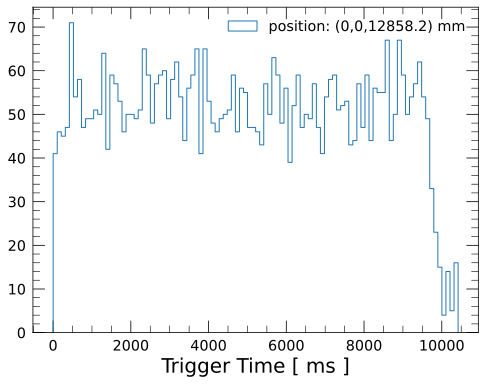

In [13]:
for position,dir_event in dir_event_diff_position.items():
    dir_event["TrigTime"] = dir_event["TrigTimeSec"]*1e3 +\
                            dir_event["TrigTimeNanoSec"]*1e-6 # ms
    h = plt.hist(dir_event["TrigTime"], bins=100, histtype="step",
             label=f"position: ({','.join(position.split('_')[1:])}) mm")
    break
plt.legend()
plt.xlabel("Trigger Time [ ms ]")


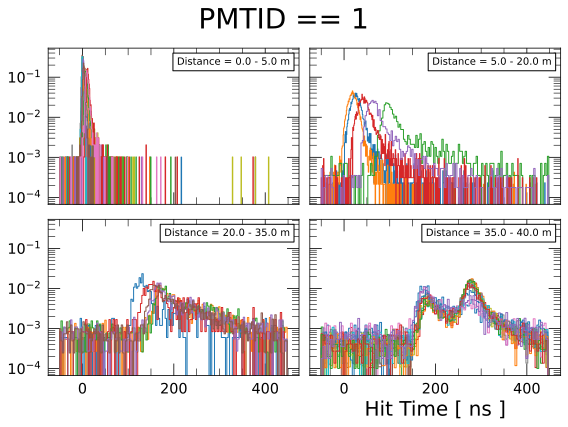

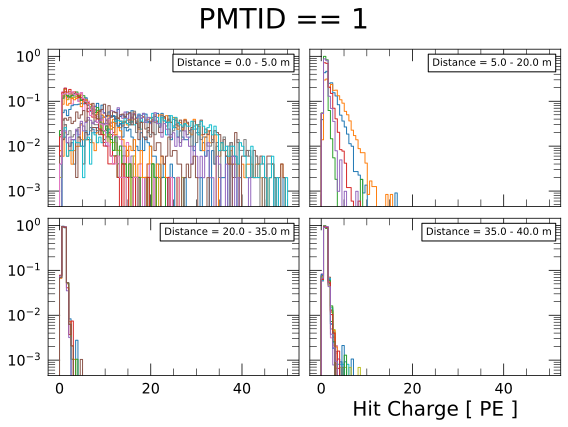

In [14]:
from matplotlib.offsetbox import AnchoredText

#-------- set number of bins for histogram 
v_n_bins = []
for R in v_distance_vertex_and_pmt/1e3:
    if R<10:
        v_n_bins.append(1)
    elif R<35:
        v_n_bins.append(3)
    else:
        v_n_bins.append(4)

bins_R_subplots = [0, 0.5e4, 2e4,3.5e4, 4e4 ]
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
fig_charge, axes_charge = plt.subplots(2,2,sharex=True, sharey=True)
for i,(position,dir_event) in enumerate(dir_event_diff_position.items()):
    # bins_hittime = np.arange(100, 600, v_n_bins[i])
    bins_hittime = np.arange(-50, 450, v_n_bins[i])
    i_subplot = np.digitize(v_distance_vertex_and_pmt[i],bins_R_subplots)-1
    ax = np.concatenate(axes)[i_subplot]
    ax_charge = np.concatenate(axes_charge)[i_subplot]
    hittime_certain_pmt = []
    charge_certain_pmt = []
    for j,(v_time,v_pmtid,v_charge) in enumerate(zip(dir_event["Time"],dir_event["SimplePMTID"],
                              dir_event["Charge"])):
        if j >= len(dir_event_diff_position_rec[position]["m_FadcEvtT"]):
            break
        index_certain_pmt = (v_pmtid==pmtid_certain)
        #------- Fill all hits time-------------
        # hittime_certain_pmt.extend(v_time[index_certain_pmt])
        #-----------------------------------------

        # ------- Fill Only First hit time -------------
        if len(v_time[index_certain_pmt])>1:
            hittime_certain_pmt.extend([min(v_time[index_certain_pmt])-dir_event_diff_position_rec[position]["m_FadcEvtT"][j]])
            charge_certain_pmt.extend([v_charge[np.argmin(v_time[index_certain_pmt])]])
        else:
            hittime_certain_pmt.extend(v_time[index_certain_pmt]-dir_event_diff_position_rec[position]["m_FadcEvtT"][j])
            charge_certain_pmt.extend(v_charge[index_certain_pmt])

    hist = ax.hist(hittime_certain_pmt, bins=bins_hittime, histtype="step",
             density=True, label=f"position: ({','.join(position.split('_')[1:])}) mm")
    ax.semilogy()
    hist_charge = ax_charge.hist(charge_certain_pmt, bins=np.linspace(0,50,100), histtype="step",
                   density=True, label=f"position: ({','.join(position.split('_')[1:])}) mm")
    ax_charge.semilogy()
    dir_event["h_hittime"] = hist

axes[1][1].set_xlabel("Hit Time [ ns ]")
fig.suptitle(f"PMTID == {pmtid_certain}",fontsize=28)
fig.tight_layout()

axes_charge[1][1].set_xlabel("Hit Charge [ PE ]")
fig_charge.suptitle(f"PMTID == {pmtid_certain}",fontsize=28)
fig_charge.tight_layout()
for i, (ax, ax_charge) in enumerate(zip(np.concatenate(axes), np.concatenate(axes_charge))):
    anchored_text = AnchoredText(f"Distance = {bins_R_subplots[i]/1000} - {bins_R_subplots[i+1]/1000} m",loc="upper right")
    ax.add_artist(anchored_text)

    anchored_text_charge = AnchoredText(f"Distance = {bins_R_subplots[i]/1000} - {bins_R_subplots[i+1]/1000} m",loc="upper right")
    ax_charge.add_artist(anchored_text_charge)

fig.savefig(f"{path_savefig}/hist_time_arrive_PMTID{pmtid_certain}.png")
fig_charge.savefig(f"{path_savefig}/hist_charge_PMTID{pmtid_certain}.png")


Hits-Time around 400 ns are from the optical photon reflected from the
other side of detector.

In [15]:
time_max_cut = 250
from HistTools import GetBinCenter
v_time_arrive = []
v_time_arrive_fastest = []
for position,dir_event in dir_event_diff_position.items():
    h = dir_event["h_hittime"]
    bin_center = GetBinCenter(h[1])
    i_bin_max = np.argmax(h[0][bin_center<time_max_cut])
    time_arrive = bin_center[i_bin_max]
    dir_event["time_arrive"] = time_arrive
    v_time_arrive.append(time_arrive)

In [16]:
import ROOT
import root_numpy as rn


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(Time) TTree Float_t branch Time will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #70 because Time cannot accommodate the value -145.805
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #169 because Time cannot accommodate the value -64.9456
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #212 because Time cannot accommodate the value 549.538
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #241 because Time cannot accommodate the value -117.39
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling --

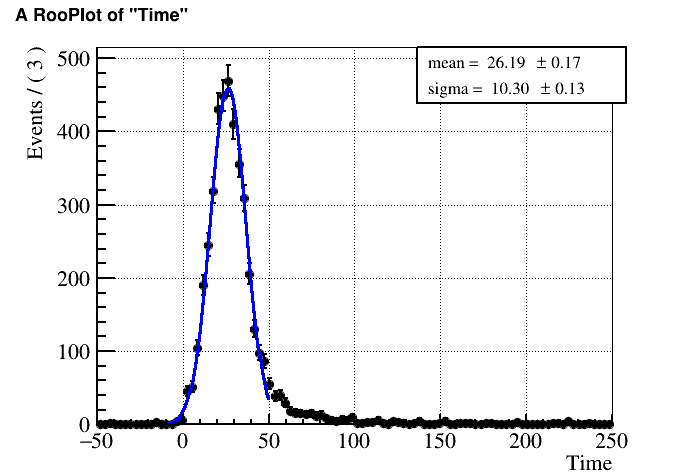

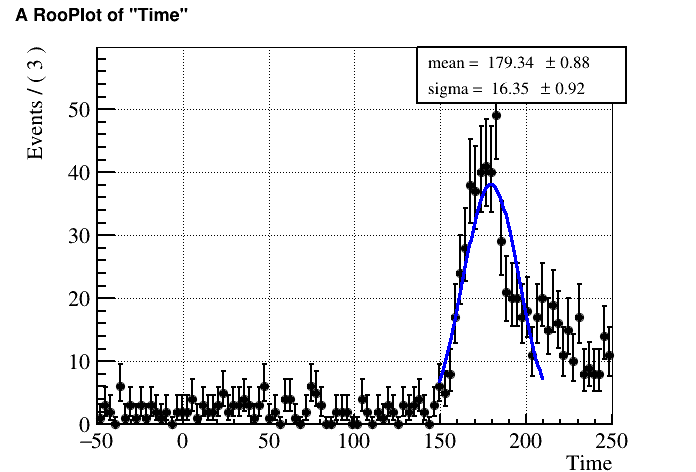

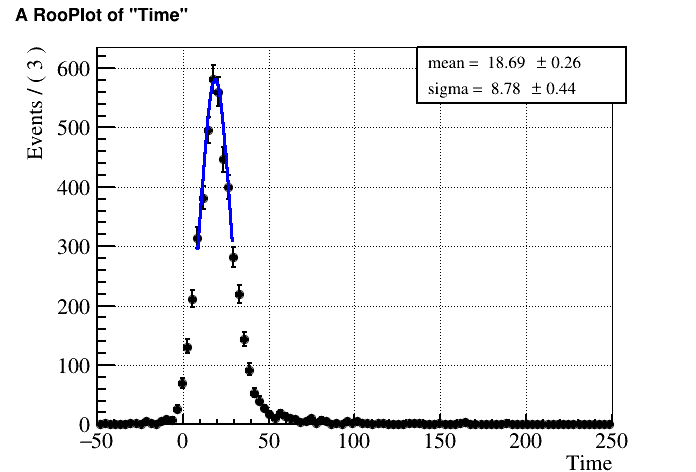

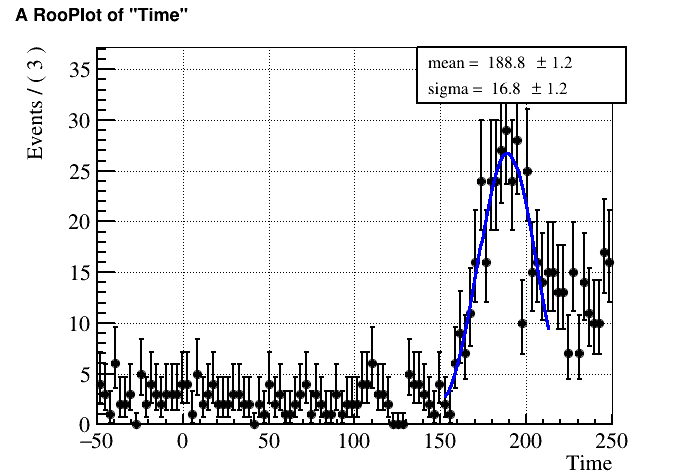

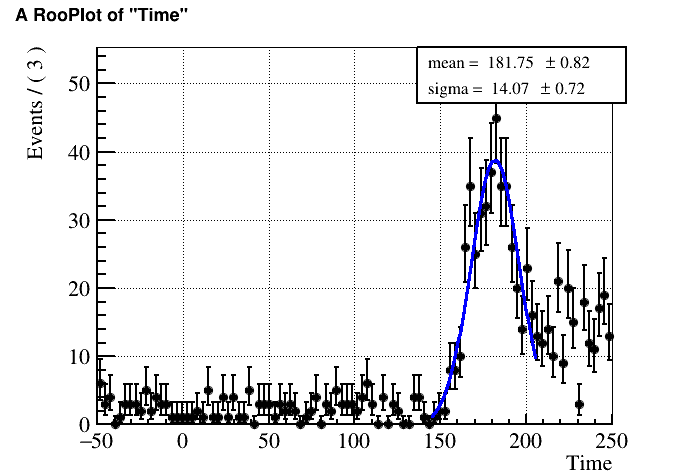

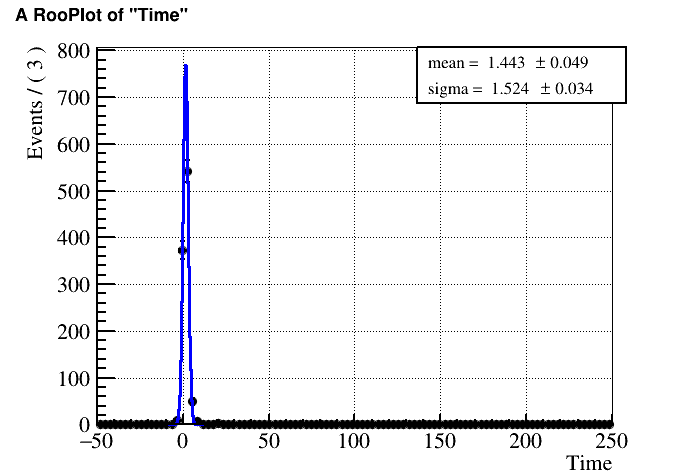

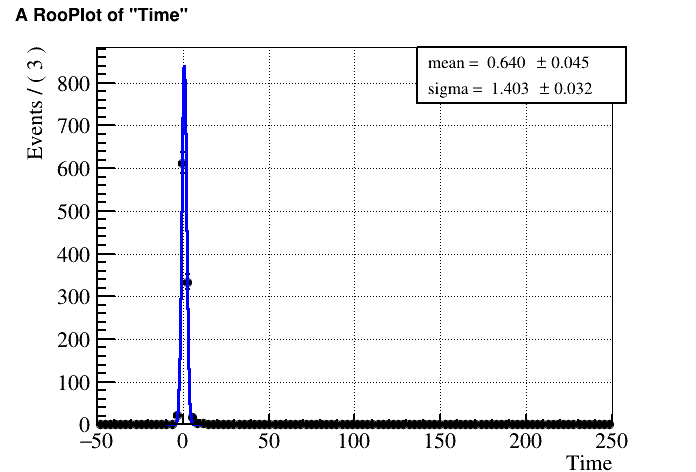

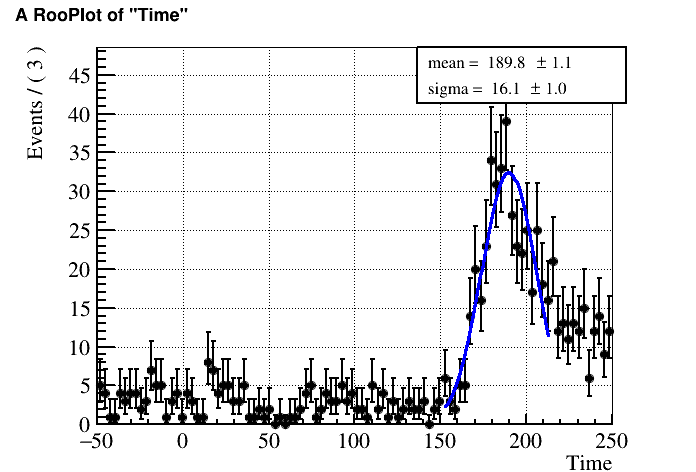

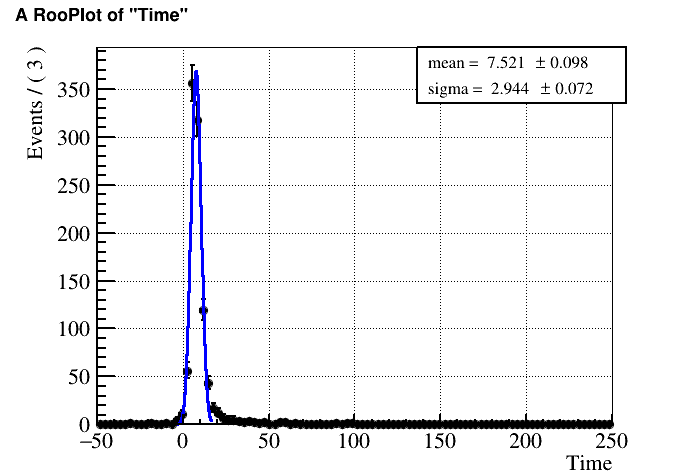

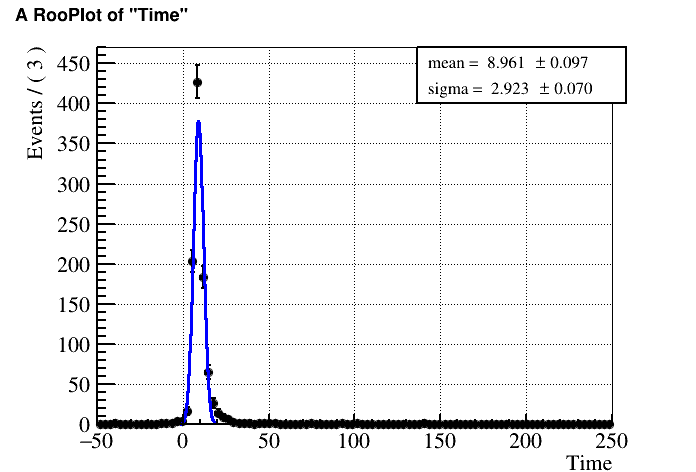

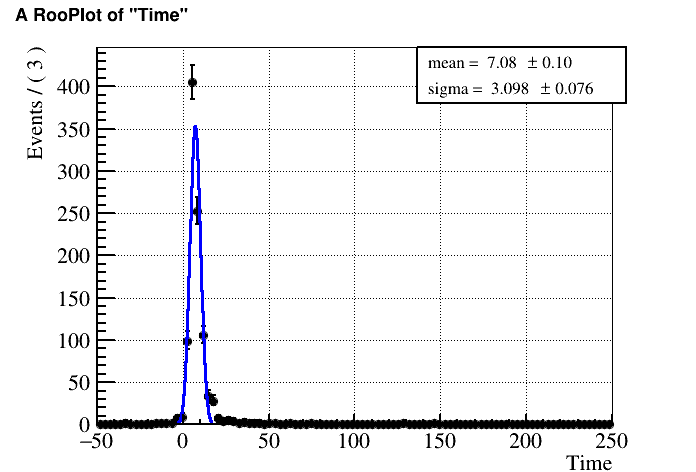

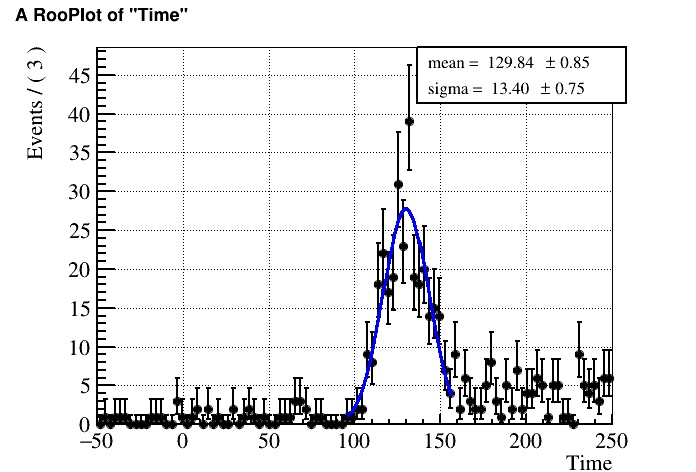

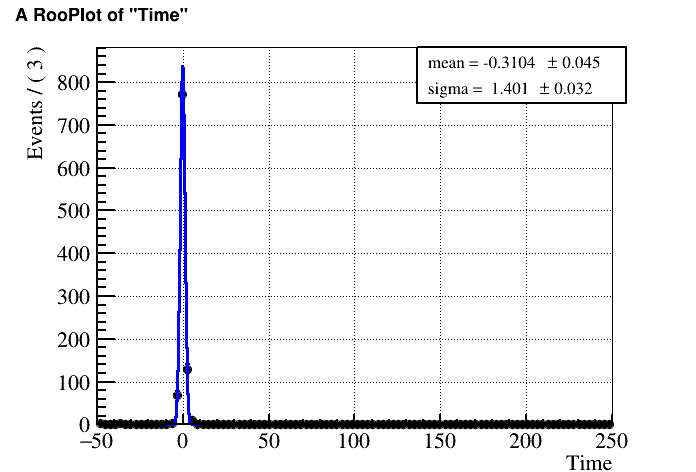

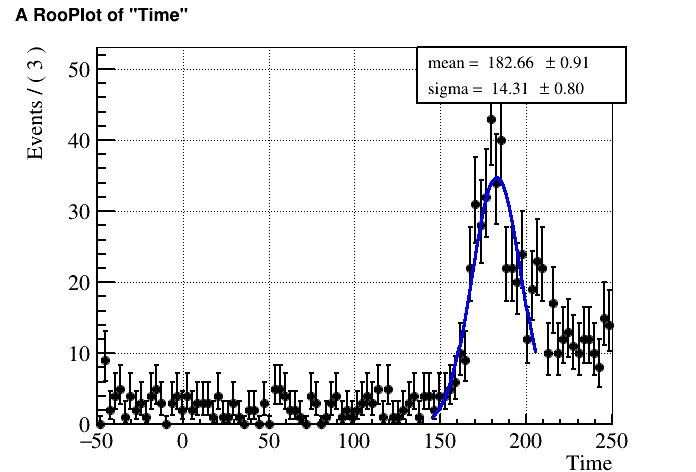

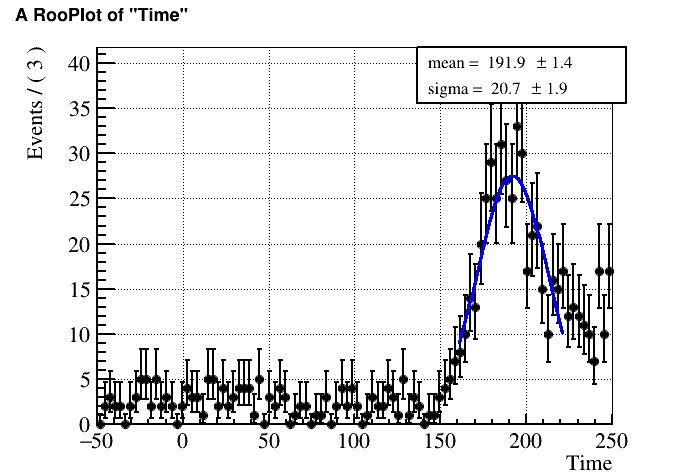

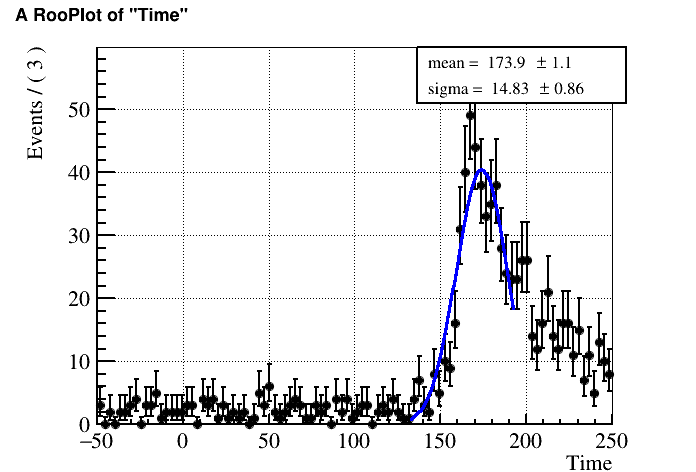

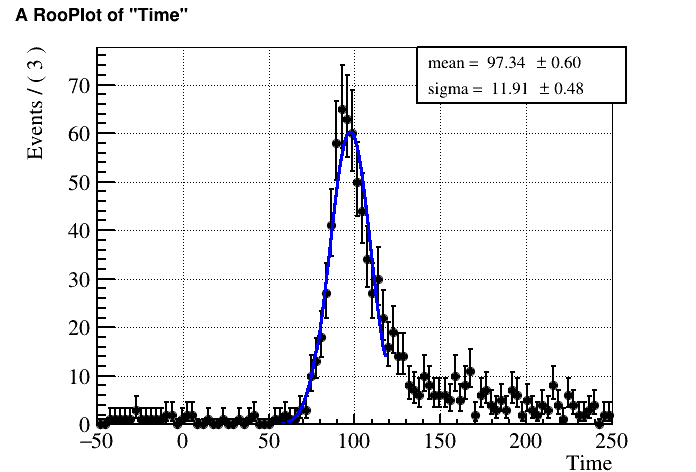

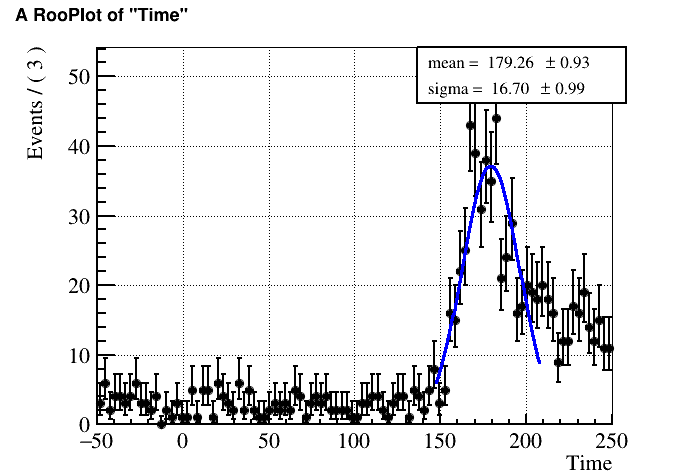

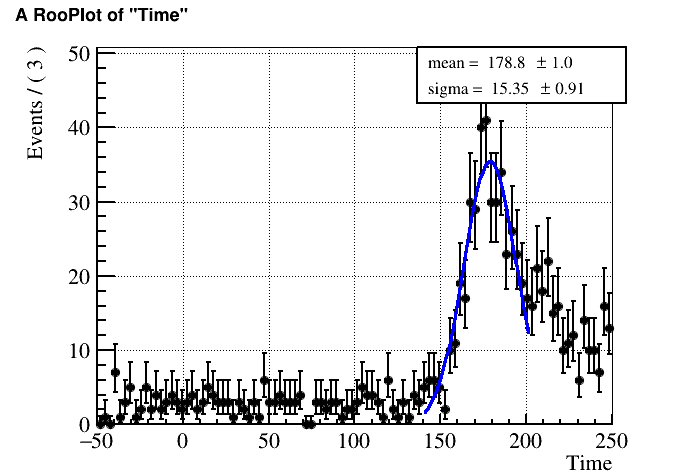

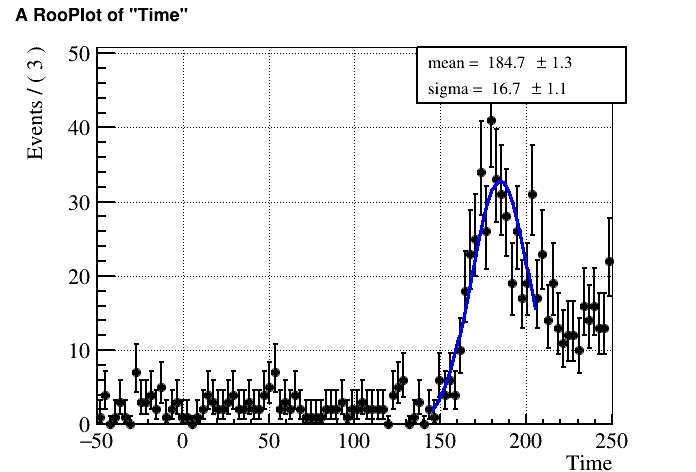

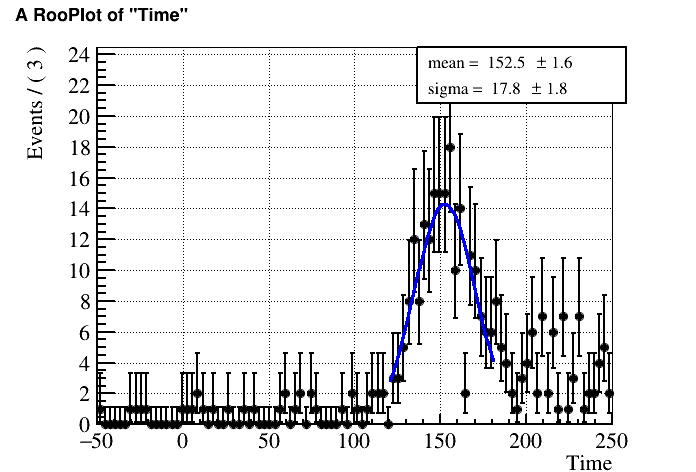

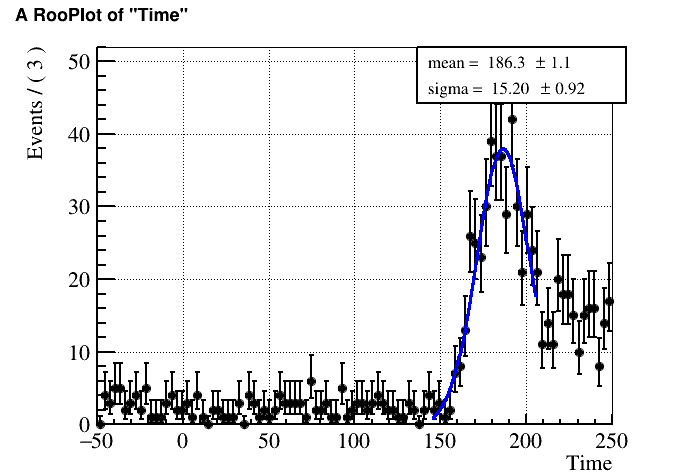

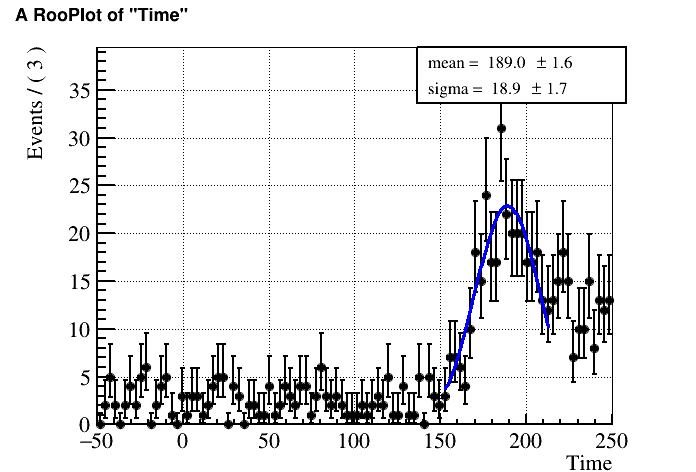

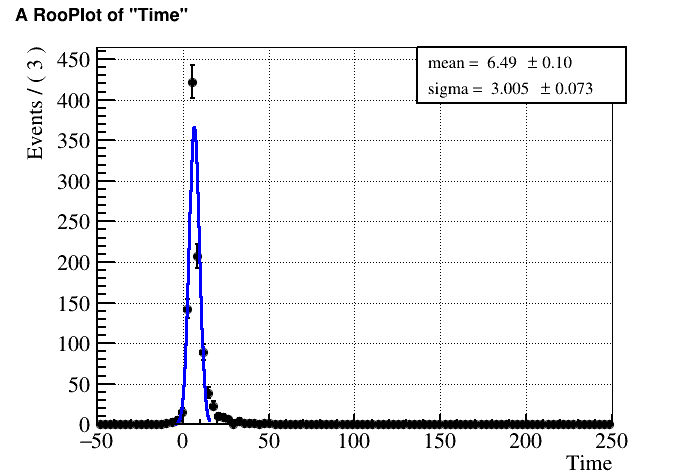

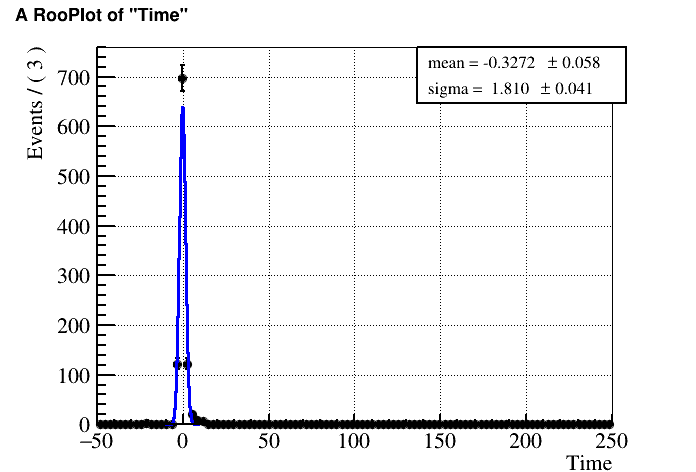

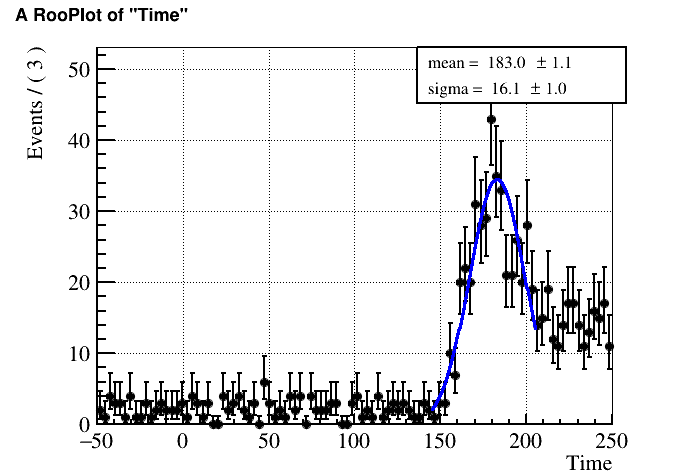

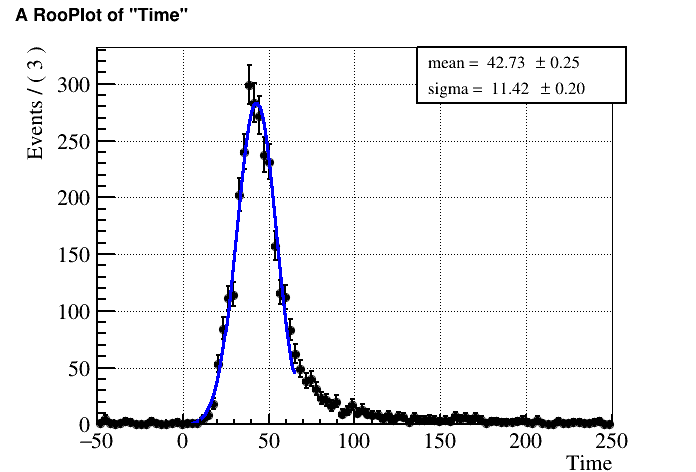

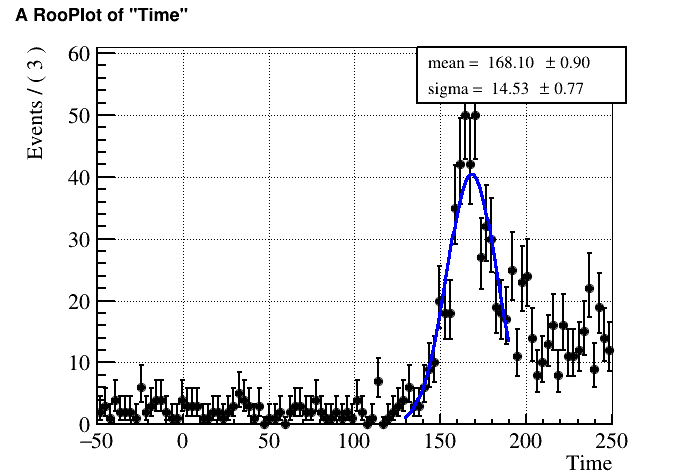

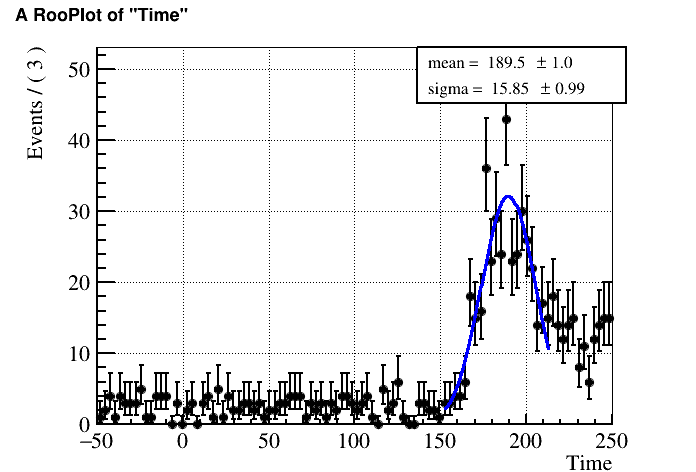

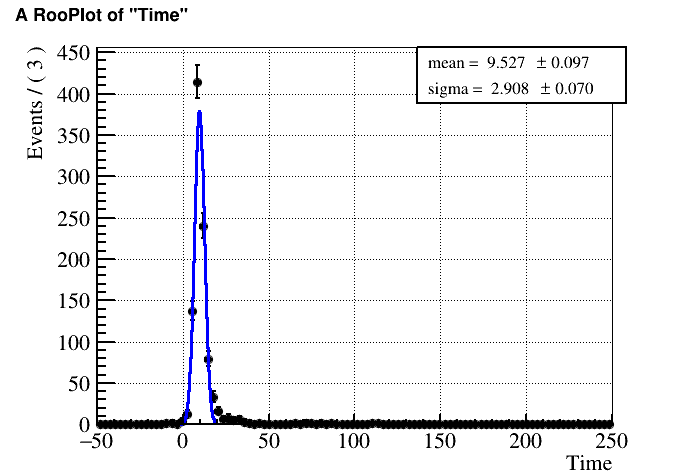

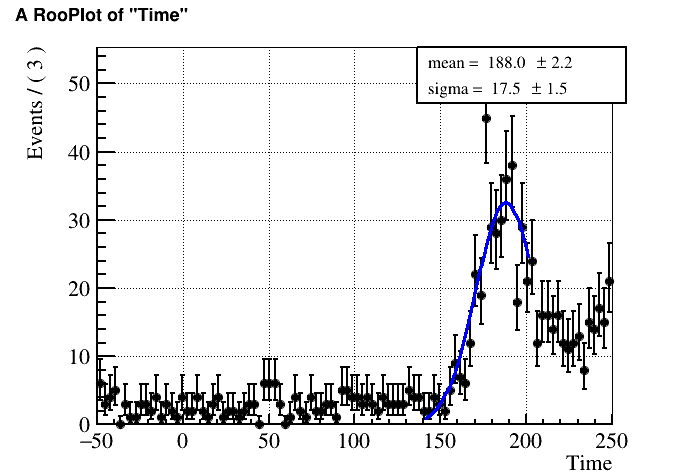

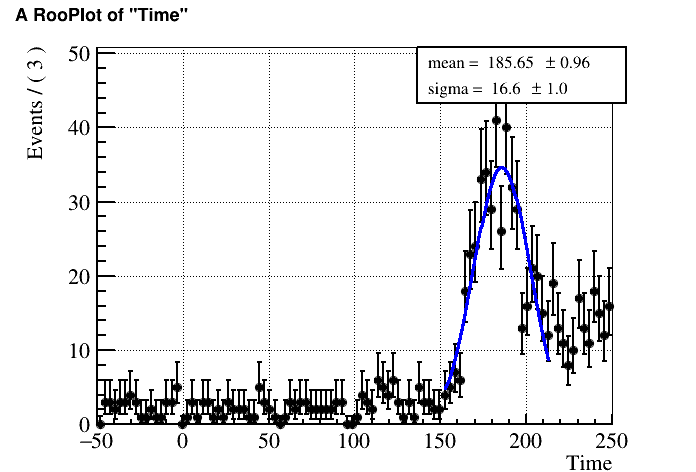

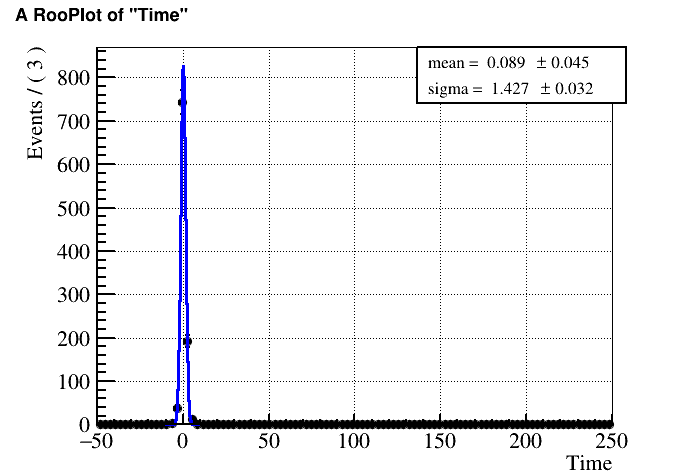

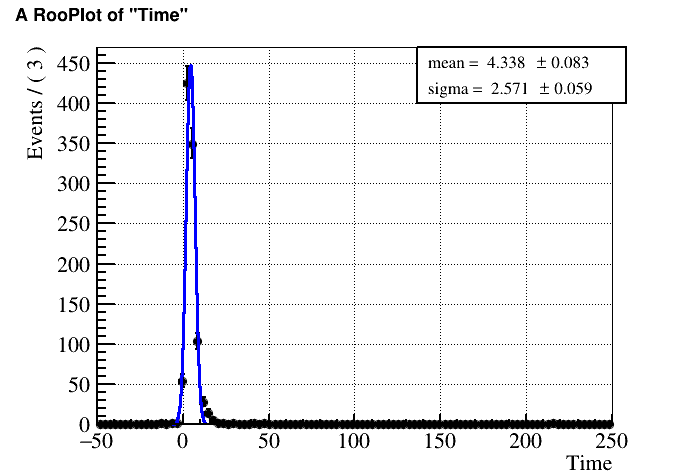

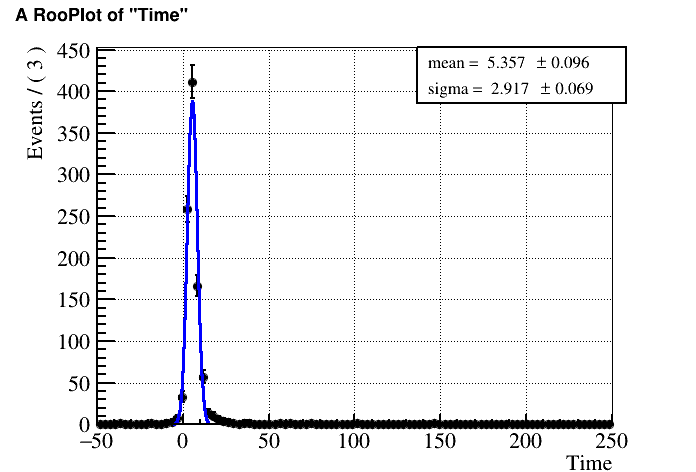

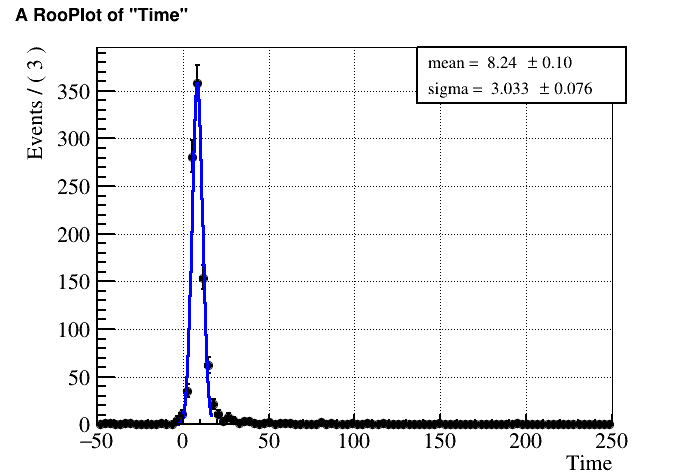

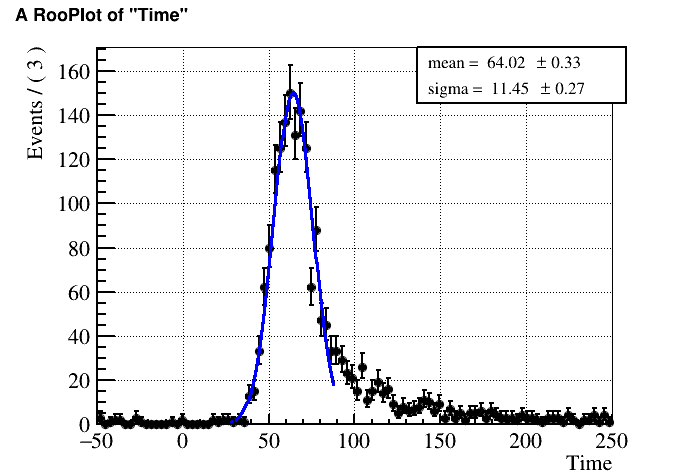

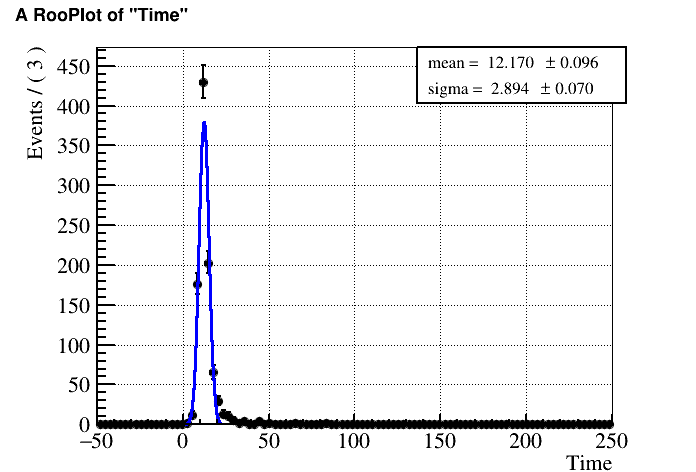

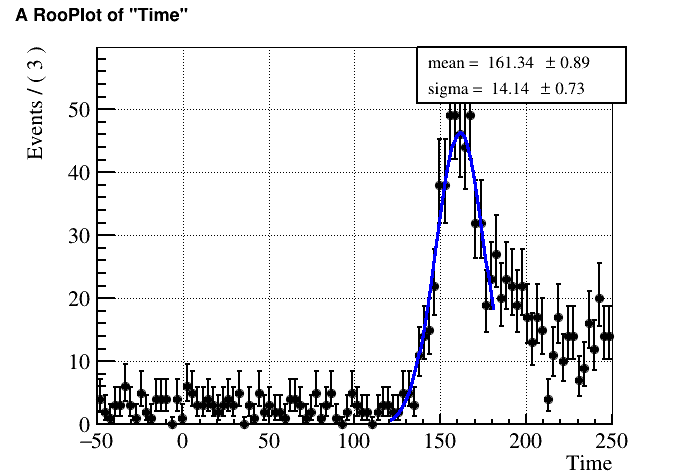

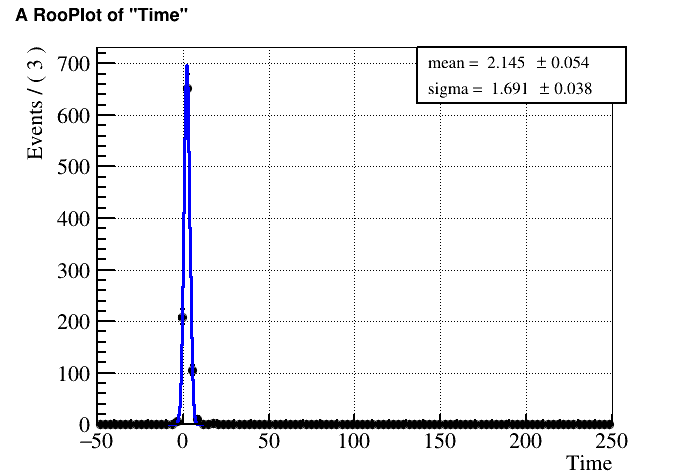

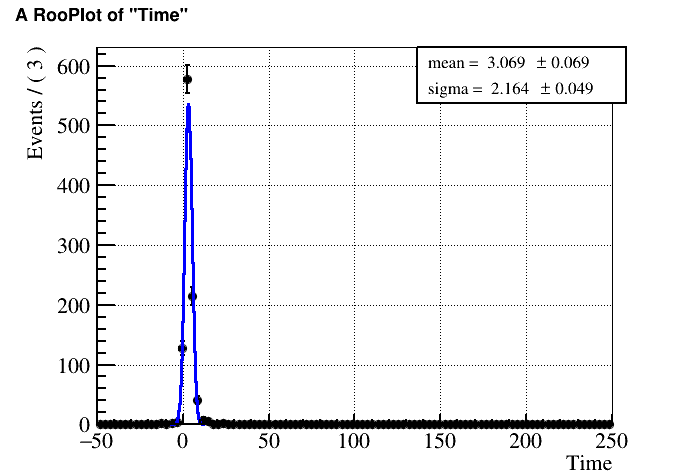

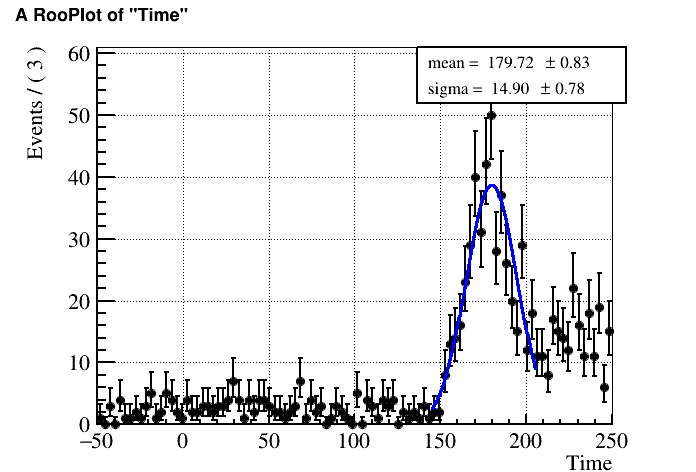

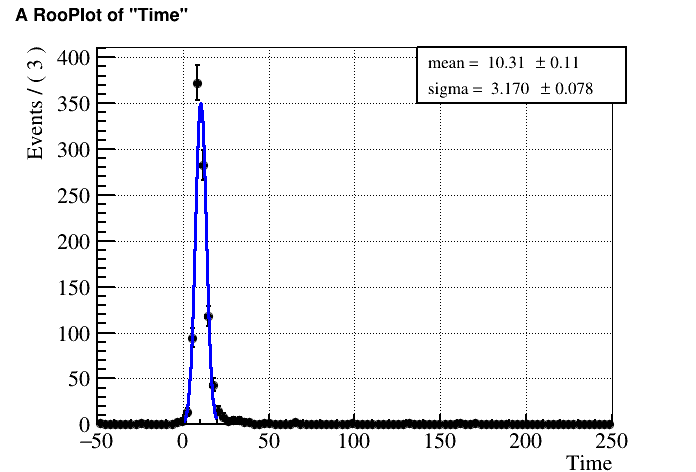

In [17]:
x_max = time_max_cut
x_min = -50
v_time_arrive_fit = []
v_time_arrive_error = []
for i,(position,dir_event) in enumerate(dir_event_diff_position.items()):
    hittime_certain_pmt = []
    for j,(v_time,v_pmtid) in enumerate(zip(dir_event["Time"],dir_event["SimplePMTID"])):
        index_certain_pmt = (v_pmtid==pmtid_certain)
        if j >= len(dir_event_diff_position_rec[position]["m_FadcEvtT"]):
            break

        if len(v_time[index_certain_pmt])>1:
            hittime_certain_pmt.extend([min(v_time[index_certain_pmt])-dir_event_diff_position_rec[position]["m_FadcEvtT"][j]])
        else:
            hittime_certain_pmt.extend(v_time[index_certain_pmt]-dir_event_diff_position_rec[position]["m_FadcEvtT"][j])
    x = ROOT.RooRealVar("Time","Time",x_min,x_max)

    # Construct signal pdf
    mean = ROOT.RooRealVar("mean", "mean", v_time_arrive[i], x_min, x_max)

    if v_time_arrive[i] <20:
        sigma = ROOT.RooRealVar("sigma", "sigma", 1, 0.1, 300)
    else:
        sigma = ROOT.RooRealVar("sigma", "sigma", 2, 0.1, 300)
    gx = ROOT.RooGaussian("gx", "gx", x, mean, sigma)
    # gx = ROOT.RooLandau("gx", "gx", x, mean, sigma)

    f = ROOT.RooRealVar("f", "f", 0.5, 0.0, 1.0)

    v_time = np.array(hittime_certain_pmt, dtype=[('Time',np.float32)])
    tree_time = rn.array2tree(v_time,name='HitTime')
    data = ROOT.RooDataSet("data","data",ROOT.RooArgSet(x), ROOT.RooFit.Import(tree_time))
    if v_time_arrive[i] <20:
        x.setRange("signal", v_time_arrive[i]-10, v_time_arrive[i]+10)
    else:
        x.setRange("signal", v_time_arrive[i]-35, v_time_arrive[i]+25)

    fit_result = gx.fitTo(data, ROOT.RooFit.Range("signal"), ROOT.RooFit.Save())
    # print("Chi2:\t", fit_result.minNll())

    locals()[f"c{i}"] = ROOT.TCanvas(f"c_time_{i}","")
    xframe = x.frame()
    data.plotOn(xframe)
    gx.plotOn(xframe)
    gx.paramOn(xframe, ROOT.RooFit.Layout(0.6,0.9,0.9),ROOT.RooFit.ShowConstants(True))
    xframe.Draw()
    locals()[f"c{i}"].Draw()

    v_time_arrive_fit.append(mean.getVal(0))
    v_time_arrive_error.append(sigma.getVal(0))

Text(0.5, 0, 'Relative Arriving Time [ ns ]')

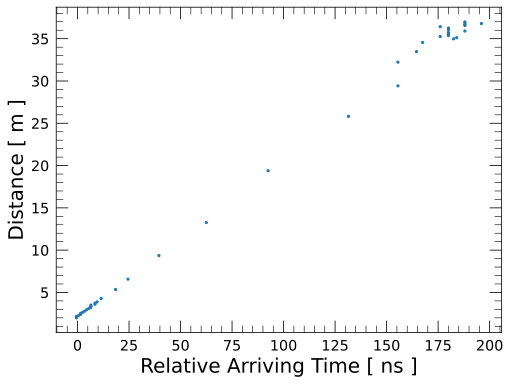

In [18]:
v_distance_vertex_and_pmt = np.array(v_distance_vertex_and_pmt)
plt.scatter(v_time_arrive,v_distance_vertex_and_pmt/1e3,s=5)
plt.ylabel("Distance [ m ]")
plt.xlabel("Relative Arriving Time [ ns ]")

Distance Bins:	 0 3
Fitting Results:	 2.1814340734748345
Distance Bins:	 3 32
Fitting Results:	 2.1654277477747232
Distance Bins:	 32 40
Fitting Results:	 9.774677244310809
Distance Bins:	 4 40
Fitting Results:	 2.0758903123905137
Distance Bins:	 0 40
Fitting Results:	 2.177267836856434


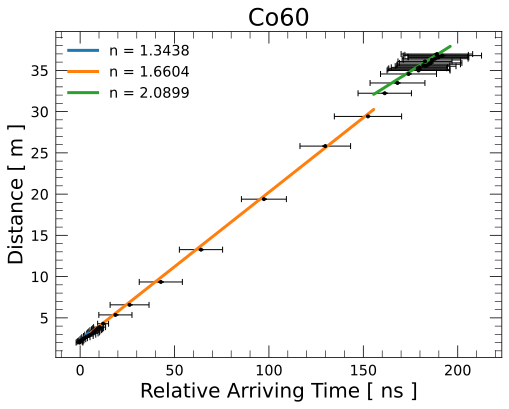

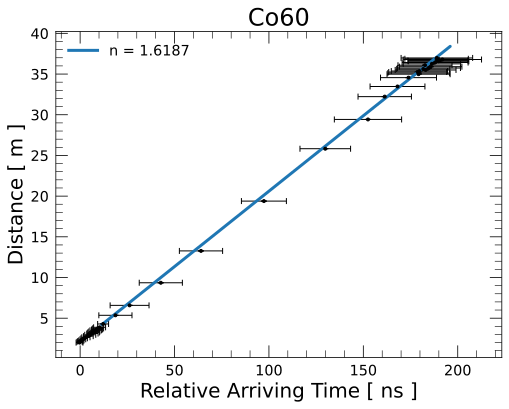

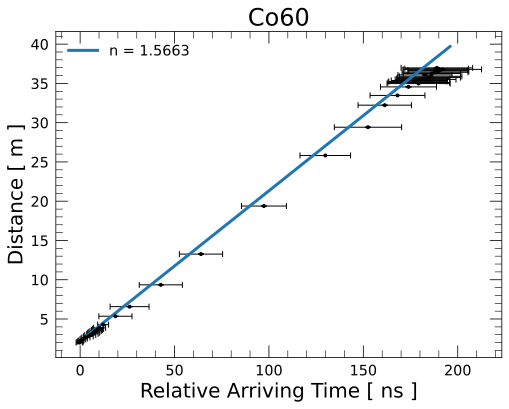

In [24]:

from scipy.optimize import curve_fit
def func(x, k, b):
    x = np.array(x)
    return  x*k+b

for i_fig,distance_bins_to_fit in enumerate([[0, 3, 32, 40], [4,40],[0, 40]]):
    plt.figure()
    v_distance_vertex_and_pmt_m = np.array(v_distance_vertex_and_pmt)/1e3
    v_time_arrive = np.array(v_time_arrive)
    
    plt.errorbar(v_time_arrive_fit, v_distance_vertex_and_pmt/1e3, xerr=v_time_arrive_error,
                 yerr=[0]*len(v_distance_vertex_and_pmt), fmt='o', markersize=3, capsize=3,
                                linewidth=1,c="black")
    plt.ylabel("Distance [ m ]")
    plt.xlabel("Relative Arriving Time [ ns ]")
    plt.title(v_position[0].split("_")[0])

    for i in range(len(distance_bins_to_fit)-1):
        index_distance_cut = ( (v_distance_vertex_and_pmt_m<distance_bins_to_fit[i+1]) &
                             (v_distance_vertex_and_pmt_m>distance_bins_to_fit[i]) )

        popt, pcov = curve_fit(func, v_distance_vertex_and_pmt[index_distance_cut]/1e3,
                               v_time_arrive[index_distance_cut], sigma=v_time_arrive[index_distance_cut])
        plt.plot(v_time_arrive[index_distance_cut], func(v_time_arrive[index_distance_cut], 1/popt[0],-popt[1]/popt[0]),
                 label=f"n = {0.3*popt[0]:.4f}")
        print("Distance Bins:\t",distance_bins_to_fit[i], distance_bins_to_fit[i+1])
        print("Fitting Results:\t", -popt[1]/popt[0])
    plt.legend()

    plt.savefig(f"{path_savefig}/R_VS_time_arrive_PMTID{pmtid_certain}_{name_source.replace('/','_')}_fig{i_fig}_{option_rec}.png")

In [20]:
for key,dir_event in dir_event_diff_position.items():
    dir_event.pop("h_hittime",None)
if not load_data:
    np.savez(path_file_npz,calib_events=dir_event_diff_position,rec_events=dir_event_diff_position_rec)

